#This notebook calculates the sentiment value of each tweet and average over a day, then plots the changes in daily average sentiment vs daily COVID19 new case numbers

Setting up environment. You can check out malaya, a Natural-Language-Toolkit library for bahasa Malaysia from https://github.com/huseinzol05/malaya

In [ ]:
# !pip install malaya[gpu]
!pip install malaya

     |████████████████████████████████| 2.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 30.3 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 1.6 MB 32.6 MB/s 
     |████████████████████████████████| 235 kB 52.2 MB/s 
     |████████████████████████████████| 288 kB 50.8 MB/s 
     |████████████████████████████████| 458.3 MB 10 kB/s 
     |████████████████████████████████| 41 kB 188 kB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=d83b2e199a9b997f93ce914f06f521a32fcf647cf6102482682dd539b95b6f0f
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=63efb773cf7c6bf3f41f643f89402630e0bb4f22c4f0afe51551d7e2896bd1f9
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
Successfully built ft

In [ ]:
!pip install youtokentome

     |████████████████████████████████| 1.7 MB 5.5 MB/s 


In [ ]:
import malaya

/usr/local/lib/python3.7/dist-packages/malaya_boilerplate/frozen_graph.py:28: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  'Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loads the frozen model that predicts sentiment
model = malaya.sentiment.transformer(model = 'xlnet')

downloading frozen model to /root/Malaya/sentiment/xlnet/model.pb


447MB [00:10, 42.9MB/s]                         


downloading frozen vocab to /root/Malaya/sentiment/xlnet/sp10m.cased.v9.vocab


  0%|          | 0.00/0.54 [00:00<?, ?MB/s]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:536: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
184%|██████████| 1.00/0.54 [00:00<00:00, 3.65MB/s]


downloading frozen tokenizer to /root/Malaya/sentiment/xlnet/sp10m.cased.v9.model


135%|██████████| 1.00/0.74 [00:00<00:00, 4.32MB/s]


In [ ]:
test = 'Sebuah apartemen di Kuala Lumpur, Malaysia diisolasi setelah 17 penghuninya terkena #COVID19 apartemen di Kuala Lumpur, Malaysia diisolasi setelah 17 penghuninya terkena #COVID19.'

In [ ]:
test2 = "Frontliners di malaysia mesti seperti ni jgk kan....harap mereka baik2 je....kalau mcm mereka di beri kan ganjaran ok jgk....jgn mcm artis yg skrg ni minta kelebihan je....tp xde nampak kepentingannya dlm covid19...hahaha di malaysia mesti seperti ni jgk kan....harap mereka baik2 je....kalau mcm mereka di beri kan ganjaran ok jgk....jgn mcm artis yg skrg ni minta kelebihan je....tp xde nampak kepentingannya dlm covid19...hahaha"

In [ ]:
test3= "Why are the SOPs so flip-flop? The gov sucks at coming up with better SOPs controlling COVID19. They better do something about it"

In [ ]:
model.predict_proba([test, test2, test3], add_neutral = False) #xlnet

[{'negative': 0.9892606, 'positive': 0.010739274},
 {'negative': 0.9999979, 'positive': 2.0061154e-06},
 {'negative': 0.00017552753, 'positive': 0.9998244}]

In [ ]:
import pandas as pd
import json
import datetime

In [ ]:
with open('/content/drive/MyDrive/Honours/Twitter/NRP/processed_tweets_NRP.json') as fopen:
    twitter = json.load(fopen)
print(twitter[0:10])

['𝑺𝒆𝒍𝒂𝒎𝒂𝒕 𝒎𝒂𝒍𝒂𝒎 𝒔𝒂𝒉𝒂𝒃𝒂𝒕 𝒔𝒆𝒎𝒖𝒂....𝒔𝒆𝒎𝒐𝒈𝒂 𝒔𝒆𝒏𝒕𝒊𝒂𝒔𝒂 𝒔𝒊𝒉𝒂𝒕, 𝒄𝒆𝒓𝒊𝒂 𝒅𝒂𝒏 𝒃𝒂𝒉𝒂𝒈𝒊𝒂 𝒔𝒆𝒍𝒂𝒍𝒖...💕JOM MALAM INI SOLAT HAJAT 012(16/9/2021)Kita doakan,mudah2an Allah swt angkat segera wabak covid dan hilangkan dari bumi Malaysia 𝒎𝒂𝒍𝒂𝒎 𝒔𝒂𝒉𝒂𝒃𝒂𝒕 𝒔𝒆𝒎𝒖𝒂....𝒔𝒆𝒎𝒐𝒈𝒂 𝒔𝒆𝒏𝒕𝒊𝒂𝒔𝒂 𝒔𝒊𝒉𝒂𝒕, 𝒄𝒆𝒓𝒊𝒂 𝒅𝒂𝒏 𝒃𝒂𝒉𝒂𝒈𝒊𝒂 𝒔𝒆𝒍𝒂𝒍𝒖...💕JOM MALAM INI SOLAT HAJAT 012(16/9/2021)Kita doakan,mudah2an Allah swt angkat segera wabak covid dan hilangkan dari bumi Malaysia 𝒎𝒂𝒍𝒂𝒎 𝒔𝒂𝒉𝒂𝒃𝒂𝒕 𝒔𝒆𝒎𝒖𝒂....𝒔𝒆𝒎𝒐𝒈𝒂 𝒔𝒆𝒏𝒕𝒊𝒂𝒔𝒂 𝒔𝒊𝒉𝒂𝒕, 𝒄𝒆𝒓𝒊𝒂 𝒅𝒂𝒏 𝒃𝒂𝒉𝒂𝒈𝒊𝒂 𝒔𝒆𝒍𝒂𝒍𝒖...💕JOM MALAM INI SOLAT HAJAT 012(16/9/2021)Kita doakan,mudah2an Allah swt angkat segera wabak covid dan hilangkan dari bumi Malaysia 𝒎𝒂𝒍𝒂𝒎 𝒔𝒂𝒉𝒂𝒃𝒂𝒕 𝒔𝒆𝒎𝒖𝒂....𝒔𝒆𝒎𝒐𝒈𝒂 𝒔𝒆𝒏𝒕𝒊𝒂𝒔𝒂 𝒔𝒊𝒉𝒂𝒕, 𝒄𝒆𝒓𝒊𝒂 𝒅𝒂𝒏 𝒃𝒂𝒉𝒂𝒈𝒊𝒂 𝒔𝒆𝒍𝒂𝒍𝒖...💕JOM MALAM INI SOLAT HAJAT 012(16/9/2021)Kita doakan,mudah2an Allah swt angkat segera wabak covid dan hilangkan dari bumi Malaysia 𝒎𝒂𝒍𝒂𝒎 𝒔𝒂𝒉𝒂𝒃𝒂𝒕 𝒔𝒆𝒎𝒖𝒂....𝒔𝒆𝒎𝒐𝒈𝒂 𝒔𝒆𝒏𝒕𝒊𝒂𝒔𝒂 𝒔𝒊𝒉𝒂𝒕, 𝒄𝒆𝒓𝒊𝒂 𝒅𝒂𝒏 𝒃𝒂𝒉𝒂𝒈𝒊𝒂 𝒔𝒆𝒍𝒂𝒍𝒖...💕JOM MALAM INI SOLAT HAJAT 012(16/9/2021)Kita doakan,mudah2an Allah swt angkat segera wabak covid dan

In [ ]:
def predict_sentiment(tweet_lst):
  results = model.predict_proba(tweet_lst, add_neutral = False)
  pos_res = []
  for result in results:
    pos_res.append(result['positive'])
  return(pos_res)

In [ ]:
def predict_sentiment_with_neutral(tweet_lst):
  results = model.predict_proba(tweet_lst, add_neutral = False)
  pos_res = []
  for result in results:
    pos_res.append(result['positive'])
  return(pos_res)

In [ ]:
sentiment = predict_sentiment(twitter)

In [ ]:
sentiment[0:10]

[0.6450005342541173,
 0.46957151799424895,
 0.46957151799424895,
 0.004011520624112353,
 0.538202462402167,
 0.35857687709219144,
 0.14757766930352872,
 0.72944769222607,
 0.718353570529517,
 0.3756981068949012]

In [ ]:
sentiment[0:10]

In [ ]:
sum(sentiment)/len(sentiment)

0.39599791249169525

In [ ]:
df = pd.DataFrame(sentiment)

In [ ]:
df.to_csv('/content/drive/MyDrive/Honours/Twitter/NRP/results_NRP.csv')

#Working on 550 days tweets (xlnet)

In [ ]:
days = 550
now = datetime.datetime(2021, 9, 17)
date_lst = []
single = datetime.timedelta(1)

for i in range(days):
  date_lst.append(str(now)[:10])
  now -= single

In [ ]:
date_lst[-1]

'2020-03-17'

In [ ]:
json_file = '/content/drive/MyDrive/Honours/Twitter/malay_only/550_days_processed/2020-05-06_processed_tweets_NRP.json'
with open(json_file) as fopen:
    twitter = json.load(fopen)
    print(twitter[10])

COVID-19: Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysia di Rusia dinasihat terus kekal di negara itu Rakyat Malaysi

In [ ]:
#550_days_sentiment

avg_sentiment_lst = []

for d in range(len(date_lst)):
  filename = f'/content/drive/MyDrive/Honours/Twitter/malay_only/550_days_processed/{date_lst[d]}_processed_tweets_NRP.json'
  with open(filename) as fopen:
    twitter = json.load(fopen)
    sentiment = []
    for tweet in twitter:
      sentiment.append(predict_sentiment([tweet])[0])
  df = pd.DataFrame(sentiment)
  df.to_csv(f'/content/drive/MyDrive/Honours/Twitter/malay_only/550_days_sentiment_xlnet/{date_lst[d]}_results_xlnet.csv')
  avg_sentiment_lst.append(sum(sentiment)/len(sentiment))

In [ ]:
json_file = '/content/drive/MyDrive/Honours/Twitter/malay_only/550_days_processed/2020-09-17_processed_tweets_NRP.json'
with open(json_file) as fopen:
  twitter = json.load(fopen)
  print(twitter[71])

Hello menteri kewangan bukan diundi rakyat malaysia. Rakyat masih terkesan dengan apa yang berlaku padal covid ni. Nak makan pon pikir dua tiga kali. Kau sibuk nak bina bangunan lah apela. Kepala hotak betul. menteri kewangan bukan diundi rakyat malaysia. Rakyat masih terkesan dengan apa yang berlaku padal covid ni. Nak makan pon pikir dua tiga kali. Kau sibuk nak bina bangunan lah apela. Kepala hotak betul. menteri kewangan bukan diundi rakyat malaysia. Rakyat masih terkesan dengan apa yang berlaku padal covid ni. Nak makan pon pikir dua tiga kali. Kau sibuk nak bina bangunan lah apela. Kepala hotak betul. menteri kewangan bukan diundi rakyat malaysia. Rakyat masih terkesan dengan apa yang berlaku padal covid ni. Nak makan pon pikir dua tiga kali. Kau sibuk nak bina bangunan lah apela. Kepala hotak betul. menteri kewangan bukan diundi rakyat malaysia. Rakyat masih terkesan dengan apa yang berlaku padal covid ni. Nak makan pon pikir dua tiga kali. Kau sibuk nak bina bangunan lah apela.

In [ ]:
avg_df = pd.DataFrame()
avg_df['dates'] = date_lst
avg_df['avg_sentiment'] = avg_sentiment_lst

In [ ]:
avg_df.to_csv('/content/drive/MyDrive/Honours/Twitter/malay_only/574_days_avg_sentiment_xlnet.csv')

#Working on 574 days tweets

In [ ]:
days = 574
now = datetime.datetime(2021, 10, 10)
date_lst = []
single = datetime.timedelta(1)

for i in range(days):
  date_lst.append(str(now)[:10])
  now -= single

In [ ]:
date_lst[-1]

'2020-03-16'

In [ ]:
#574_days_sentiment

avg_sentiment_lst = []

for d in range(len(date_lst)):
  filename = f'/content/drive/MyDrive/Honours/Twitter/any_language/574_days_processed/{date_lst[d]}_processed_tweets.json'
  with open(filename) as fopen:
    twitter = json.load(fopen)
  sentiment = predict_sentiment_with_neutral(twitter)
  df = pd.DataFrame(sentiment)
  df.to_csv(f'/content/drive/MyDrive/Honours/Twitter/any_language/574_days_sentiment/{date_lst[d]}_results.csv')
  avg_sentiment_lst.append(sum(sentiment)/len(sentiment))

In [ ]:
avg_df = pd.DataFrame()
avg_df['dates'] = date_lst
avg_df['avg_sentiment'] = avg_sentiment_lst

In [ ]:
avg_df.to_csv('/content/drive/MyDrive/Honours/Twitter/any_language/574_days_avg_sentiment.csv')

#Plotting!!!

In [ ]:
avg_df = pd.read_csv('/content/drive/MyDrive/Honours/Twitter/any_language/574_days_avg_sentiment.csv')
daily_case_number = pd.read_csv('/content/drive/MyDrive/Honours/Twitter/any_language/msia_covid_daily_10-10.csv')

In [ ]:
#reversing the order for avg_sentiment

avg_df = avg_df.iloc[::-1]
avg_df = avg_df.sort_index(axis=1 ,ascending=True)

In [ ]:
avg_df['avg_sentiment'].tail()

4    0.502165
3    0.522666
2    0.521829
1    0.507767
0    0.529959
Name: avg_sentiment, dtype: float64

In [ ]:
#moving average with window size
window_size = 3

def moving_avg(lst):
  for i in range(window_size-1,len(lst)):
    window_lst = [lst[i-j] for j in range(window_size)]
    lst[i] = sum(window_lst)/window_size

  return(lst)

In [ ]:
avg_df['avg_sentiment'] = avg_df['avg_sentiment']
daily_case_number['New_Cases'] = daily_case_number['New_Cases']

In [ ]:
from matplotlib import pyplot as plt

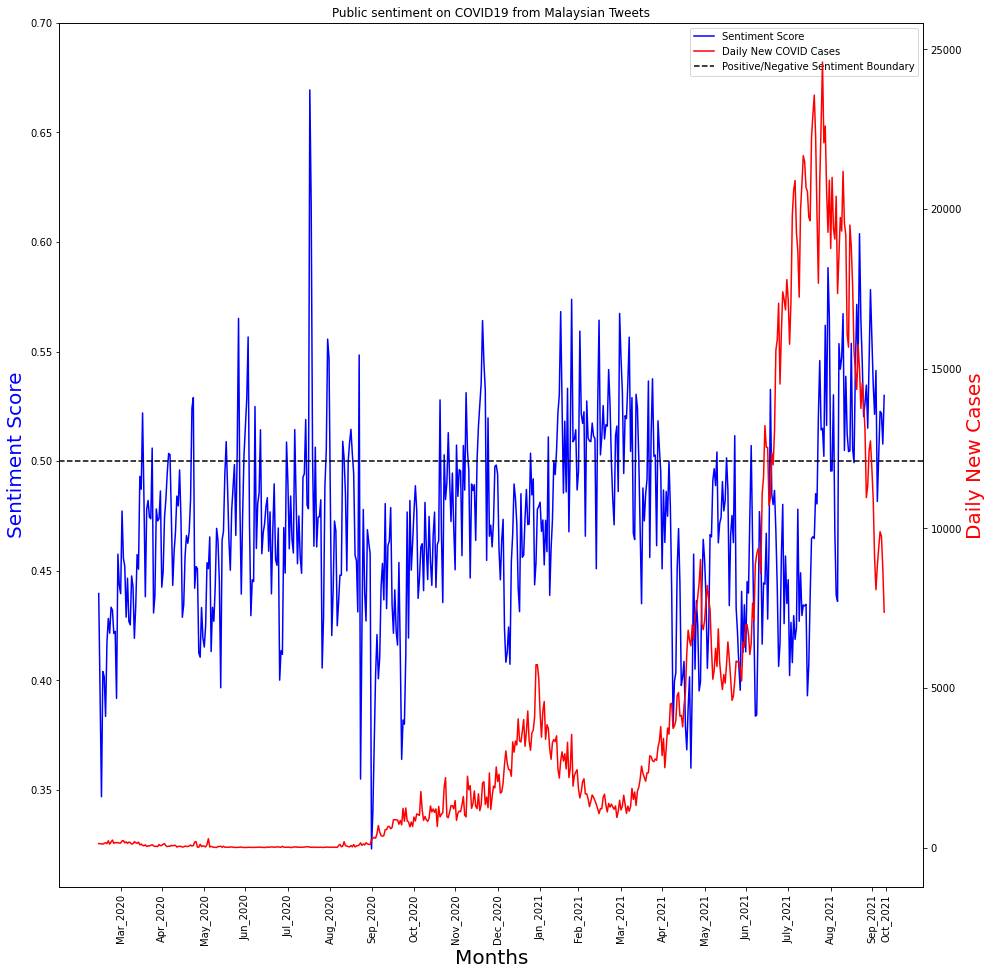

In [ ]:
# plt.figure()
# plt.plot(range(550), avg_df['avg_sentiment'])

x = range(574)
fig = plt.figure()

#sentiment plut

ax = fig.add_axes([0.1, 0.1, 2, 3]) # main axes
y = avg_df['avg_sentiment']
lns1 = ax.plot(x, y, color='blue', label='Sentiment Score')
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Sentiment Score', color='blue', fontsize=20)
ax.set_title('Public sentiment on COVID19 from Malaysian Tweets')
ax.set_xticks([16, 46, 77, 107, 138, 169, 199, 230, 260, 291, 322, 350, 381, 411, 442, 472, 503, 534, 564, 574])
ax.set_xticklabels(['Mar_2020', 'Apr_2020', 'May_2020', 'Jun_2020', 'Jul_2020', 'Aug_2020', 'Sep_2020', 'Oct_2020', \
                    'Nov_2020','Dec_2020', 'Jan_2021', 'Feb_2021', 'Mar_2021', 'Apr_2021', 'May_2021', 'Jun_2021', \
                    'July_2021', 'Aug_2021', 'Sep_2021', 'Oct_2021'], rotation='vertical')
ax.set_yticks([0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7])

#adding 0.5 threshold line
lns3 = ax.axhline(y=0.5, color='black', linestyle='--',label='Positive/Negative Sentiment Boundary')

#case number plot

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(x, daily_case_number['New_Cases'],color="red", label='Daily New COVID Cases')
ax2.set_ylabel("Daily New Cases", color="red", fontsize=20)
ax2.set_yticks([0, 5000, 10000, 15000, 20000, 25000])


#adding legend
lns = lns1+lns2
lns.append(lns3)
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

# save the plot as a file
# fig.savefig('/content/drive/MyDrive/Honours/Twitter/any_language/RAW_Tweet_Sentiment_Score_vs_Daily_COVID.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')


plt.show()

#Organising files into sav format

In [ ]:
pip install pyreadstat

     |████████████████████████████████| 2.4 MB 6.4 MB/s 


In [ ]:
#set from which day to which day you want

days = 574
now = datetime.datetime(2021, 10, 10)
date_lst = []
single = datetime.timedelta(1)

for i in range(days):
  date_lst.append(str(now)[:10])
  now -= single

#Testing for stationarity

Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = adfuller(avg_df['avg_sentiment'], autolag='BIC', regression='ct')

#result shows sentiment series is stationary as the null hypothesis of the time series having a unit root is rejected!!
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -2.640622742304748
n_lags: 19
p-value: 0.08488860487015315
Critial Values:
   1%, -3.4422089502693454
Critial Values:
   5%, -2.866771178805824
Critial Values:
   10%, -2.5695560476482164


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.DataFrame({'New_Cases':daily_case_number['New_Cases'], 'avg_sentiment':avg_df['avg_sentiment']})

In [ ]:
#Pearson correlation global and local window

overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df['New_Cases'], df['avg_sentiment'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

Pandas computed Pearson r: -0.16059480095749853
Scipy computed Pearson r: -0.1605948009574984 and p-value: 0.00011140817023275513


Text(0.5, 0.98, 'Smiling data and rolling window correlation')

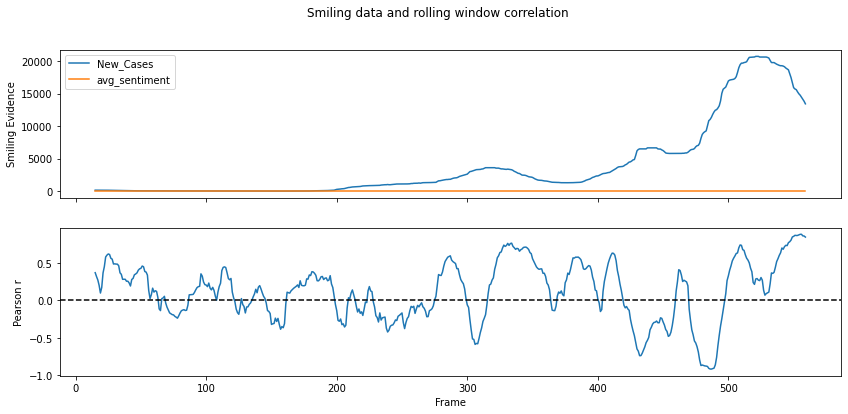

In [ ]:
# Set window size to compute moving window synchrony.
r_window_size = 30

# Compute rolling window synchrony
rolling_r = df['New_Cases'].rolling(window=r_window_size, center=True).corr(df['avg_sentiment'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
ax[1].axhline(y=0, color='black', linestyle='--')
plt.suptitle("Smiling data and rolling window correlation")

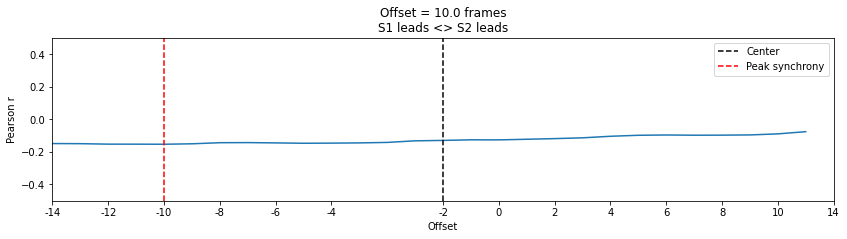

In [ ]:
#Time Lagged Cross Correlation — assessing signal dynamics

def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['New_Cases']
d2 = df['avg_sentiment']
days = 14
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days))]
offset = np.floor(len(rs)/2)-np.argmin(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmin(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.5,.5],xlim=[0,28], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 2, 4, 6, 8, 10 ,14, 16, 18, 20, 22, 24, 26, 28])
ax.set_xticklabels([-14, -12,-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10 ,14]);
plt.legend()